In [1]:
%matplotlib inline
import sys
sys.path.append("..")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from umap import UMAP
from sklearn.model_selection import StratifiedKFold, train_test_split

import utils

## Load data

In [2]:
all_embeddings = utils.get_embeddings("covidx", "masked", "densenet")
all_domain_labels = utils.get_domain_labels("covidx")

np.random.seed(1)

train_splits = []
val_splits = []
test_splits = []

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for i, (train_index, test_index) in enumerate(kf.split(all_embeddings, all_domain_labels)):

    train_index, val_index = train_test_split(train_index, test_size=0.1, stratify=all_domain_labels[train_index], random_state=1)

    train_splits.append(train_index)
    val_splits.append(val_index)
    test_splits.append(test_index)

In [3]:
unmasked_no_disentanglement_embeddings = np.load("../output/umap_experiments/covidx_unmasked_xrv_no-disentangle_split-0_1_lr-10.0_hls-64.npy")
unmasked_disentanglement_embeddings = np.load("../output/umap_experiments/covidx_unmasked_xrv_disentangle_split-0_1_lr-10.0_hls-64.npy")
masked_no_disentanglement_embeddings = np.load("../output/umap_experiments/covidx_masked_xrv_no-disentangle_split-0_1_lr-10.0_hls-64.npy")
masked_disentanglement_embeddings = np.load("../output/umap_experiments/covidx_masked_xrv_disentangle_split-0_1_lr-10.0_hls-64.npy")

In [4]:
covidx_task_labels = utils.get_task_labels("covidx")
covidx_domain_labels = utils.get_domain_labels("covidx")

In [5]:
tasks = ['Normal', 'Pneumonia', "COVID-19+"]
all_task_labels = np.concatenate([
    covidx_task_labels[train_splits[0]],
    covidx_task_labels[val_splits[0]],
    covidx_task_labels[test_splits[0]]
])

In [6]:
domains = ['covid-chestxray', 'Figure 1', 'ActualMed', 'SIRM', 'RSNA']
all_domain_labels = np.concatenate([
    covidx_domain_labels[train_splits[0]],
    covidx_domain_labels[val_splits[0]],
    covidx_domain_labels[test_splits[0]]
])

In [7]:
%%time
scaler = UMAP(random_state=1)
unmasked_no_disentanglement = scaler.fit_transform(unmasked_no_disentanglement_embeddings)

scaler = UMAP(random_state=1)
unmasked_disentanglement = scaler.fit_transform(unmasked_disentanglement_embeddings)

scaler = UMAP(random_state=1)
masked_no_disentanglement = scaler.fit_transform(masked_no_disentanglement_embeddings)

scaler = UMAP(random_state=1)
masked_disentanglement = scaler.fit_transform(masked_disentanglement_embeddings)

CPU times: user 9min 7s, sys: 43.7 s, total: 9min 51s
Wall time: 2min 5s


In [8]:
unmasked_no_disentanglement = unmasked_no_disentanglement[:all_domain_labels.shape[0]]
unmasked_disentanglement = unmasked_disentanglement[:all_domain_labels.shape[0]]
masked_no_disentanglement = masked_no_disentanglement[:all_domain_labels.shape[0]]
masked_disentanglement = masked_disentanglement[:all_domain_labels.shape[0]]

## Color by class membership

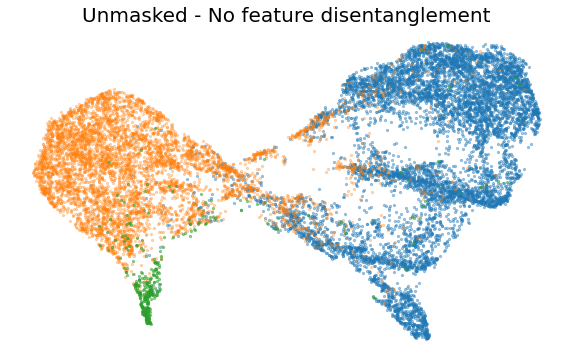

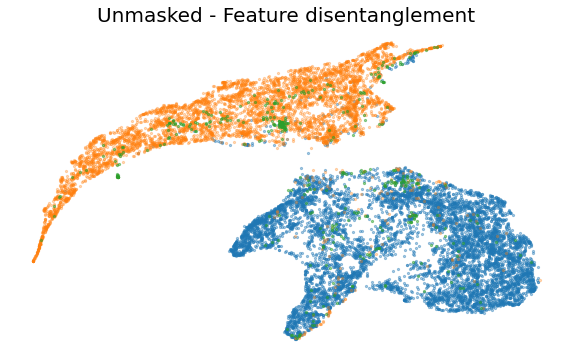

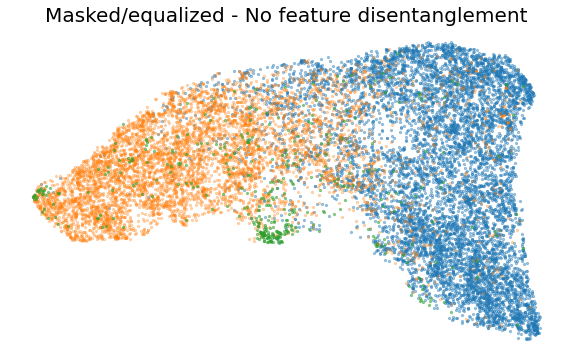

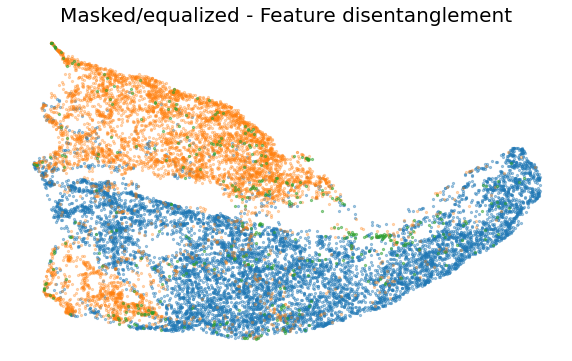

In [9]:
plots = [
    (unmasked_no_disentanglement, "Unmasked - No feature disentanglement"),
    (unmasked_disentanglement, "Unmasked - Feature disentanglement"),
    (masked_no_disentanglement, "Masked/equalized - No feature disentanglement"),
    (masked_disentanglement, "Masked/equalized - Feature disentanglement"),
]

label_colors = [
    matplotlib.colors.to_hex(matplotlib.cm.tab10.colors[i])
    for i in range(3)
]

label_alphas = [
    0.4,
    0.3,
    0.5
]

for embeddings, title in plots:

    plt.figure(figsize=(10,6))
    for i in range(3):
        mask = all_task_labels == i
        plt.scatter(embeddings[mask,0], embeddings[mask,1], s=5, alpha=label_alphas[i], c=label_colors[i], label=tasks[i])

    plt.title(title, fontsize=20)
    plt.axis("off")
    plt.show()
    plt.close()

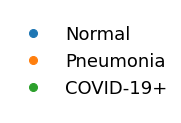

In [10]:
fig = plt.figure(figsize=(3,2))
patches = [
    matplotlib.lines.Line2D([], [], color=color, marker='.', markersize=4, linestyle="")
    for label, color in zip(tasks, label_colors)
]
ax = fig.add_subplot(1,1,1)
ax.legend(patches, tasks, loc='center', frameon=False, fontsize=18, markerscale=4.)
ax.axis("off")
plt.show()
plt.close()

## Color by dataset membership

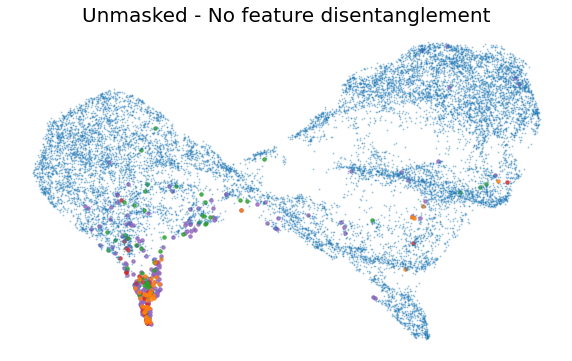

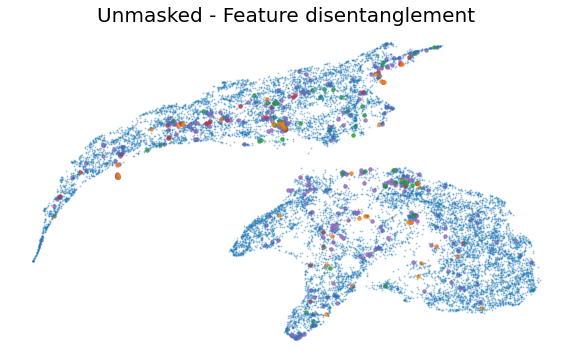

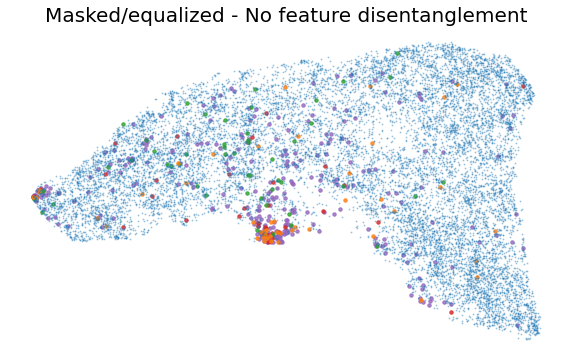

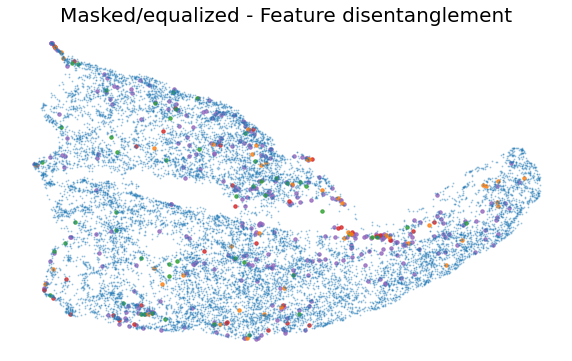

In [11]:
plots = [
    (unmasked_no_disentanglement, "Unmasked - No feature disentanglement"),
    (unmasked_disentanglement, "Unmasked - Feature disentanglement"),
    (masked_no_disentanglement, "Masked/equalized - No feature disentanglement"),
    (masked_disentanglement, "Masked/equalized - Feature disentanglement"),
]

label_colors = [
    matplotlib.colors.to_hex(matplotlib.cm.tab10.colors[i])
    for i in range(5)
]

label_colors = label_colors[::-1]

label_alphas = [
    0.8,
    0.8,
    0.8,
    0.8,
    0.3,
    0.3,
    0.8
]

label_sizes = [
    12,
    12,
    12,
    12,
    1,
    1,
    12,
]

for embeddings, title in plots:

    plt.figure(figsize=(10,6))
    for i in range(5):
        mask = all_domain_labels == i
        plt.scatter(embeddings[mask,0], embeddings[mask,1], s=label_sizes[i], alpha=label_alphas[i], c=label_colors[i], label=domains[i])

    plt.title(title, fontsize=20)
    plt.axis("off")
    plt.show()
    plt.close()

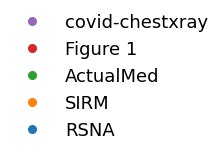

In [12]:
fig = plt.figure(figsize=(3,2))
patches = [
    matplotlib.lines.Line2D([], [], color=color, marker='.', markersize=4, linestyle="")
    for label, color in zip(domains, label_colors)
]
ax = fig.add_subplot(1,1,1)
ax.legend(patches, domains, loc='center', frameon=False, fontsize=18, markerscale=4.)
ax.axis("off")
plt.show()
plt.close()